In [1]:
import pandas as pd 
import numpy as np
import tensorflow as tf 
from tensorflow import keras 
import matplotlib.pyplot as plt 

2024-05-20 20:30:24.729320: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
df = pd.read_csv('cars.csv')
df.head()

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Car_ID             100 non-null    int64 
 1   Brand              100 non-null    object
 2   Model              100 non-null    object
 3   Year               100 non-null    int64 
 4   Kilometers_Driven  100 non-null    int64 
 5   Fuel_Type          100 non-null    object
 6   Transmission       100 non-null    object
 7   Owner_Type         100 non-null    object
 8   Mileage            100 non-null    int64 
 9   Engine             100 non-null    int64 
 10  Power              100 non-null    int64 
 11  Seats              100 non-null    int64 
 12  Price              100 non-null    int64 
dtypes: int64(8), object(5)
memory usage: 10.3+ KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Car_ID,100.0,50.50,2.901149e+01,1.0,25.75,50.5,75.25,100.0
Year,100.0,2018.39,1.171160e+00,2016.0,2017.75,2018.0,2019.00,2021.0
Kilometers_Driven,100.0,28150.00,9.121376e+03,10000.0,22000.00,27000.0,32000.00,60000.0
Mileage,100.0,17.21,3.309902e+00,10.0,15.00,17.0,19.00,25.0
Engine,100.0,1855.23,6.313115e+02,999.0,1462.00,1774.0,2143.00,4951.0
Power,100.0,158.13,7.696814e+01,68.0,103.00,148.0,187.00,396.0
Seats,100.0,5.23,7.501515e-01,4.0,5.00,5.0,5.00,7.0
Price,100.0,1574000.00,1.000265e+06,450000.0,700000.00,1300000.0,2500000.00,4000000.0


In [5]:
df.isnull().sum()

Car_ID               0
Brand                0
Model                0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [6]:
df.columns = [i.lower() for i in df.columns]

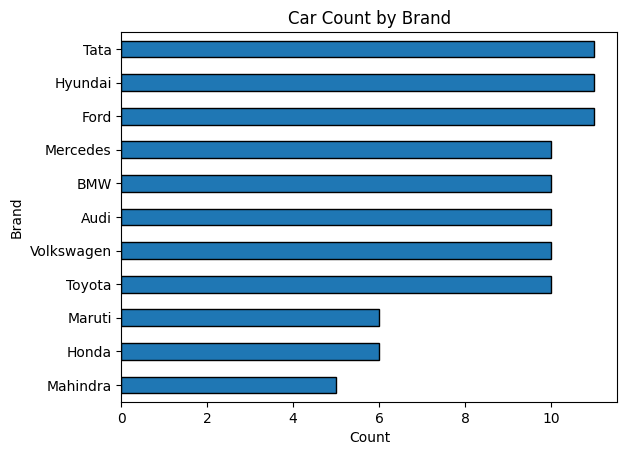

In [7]:
(df['brand'].value_counts(ascending=True)).plot(kind = 'barh', edgecolor = 'k')
plt.title('Car Count by Brand')
plt.xlabel('Count')
plt.ylabel('Brand')
plt.show()

Models of Each Brand

In [8]:
df.groupby('brand')['model'].value_counts()


brand       model        
Audi        A3               2
            A5               2
            A6               2
            Q7               2
            Q3               1
            A4               1
BMW         3 Series         2
            7 Series         2
            X3               2
            X5               2
            5 Series         1
            X1               1
Ford        Mustang          3
            Ranger           2
            Aspire           2
            EcoSport         2
            Figo             1
            Endeavour        1
Honda       BR-V             2
            WR-V             2
            Civic            1
            City             1
Hyundai     Verna            3
            Santro           2
            Venue            2
            Elantra          2
            Creta            1
            Sonata           1
Mahindra    XUV300           2
            Thar             2
            Scorpio          1
Maruti      S

Unique Models

In [9]:
df['model'].unique()

array(['Corolla', 'Civic', 'Mustang', 'Swift', 'Sonata', 'Nexon',
       'Scorpio', 'Polo', 'A4', 'X1', 'C-Class', 'Endeavour', 'Creta',
       'Harrier', 'Ertiga', 'City', 'Tiguan', 'Q3', '5 Series', 'GLC',
       'Innova', 'Figo', 'Verna', 'Altroz', 'Thar', 'Passat', 'A6', 'X3',
       'E-Class', 'Fortuner', 'Aspire', 'Elantra', 'Safari', 'Vitara',
       'WR-V', 'Ameo', 'A3', '7 Series', 'GLE', 'Yaris', 'Ranger',
       'Santro', 'Tigor', 'S-Cross', 'BR-V', 'T-Roc', 'Q7', 'X5', 'GLA',
       'Camry', 'Venue', 'Tiago', 'XUV300', 'Vento', 'A5', '3 Series',
       'Innova Crysta', 'EcoSport'], dtype=object)

In [10]:
df.columns

Index(['car_id', 'brand', 'model', 'year', 'kilometers_driven', 'fuel_type',
       'transmission', 'owner_type', 'mileage', 'engine', 'power', 'seats',
       'price'],
      dtype='object')

In [11]:
numerical_cols = ['year','kilometers_driven', 'mileage', 'engine', 'power', 'seats']
categorical_cols = ['brand','model', 'fuel_type', 'transmission', 'owner_type']

In [12]:
df = df.drop('car_id',axis =1)

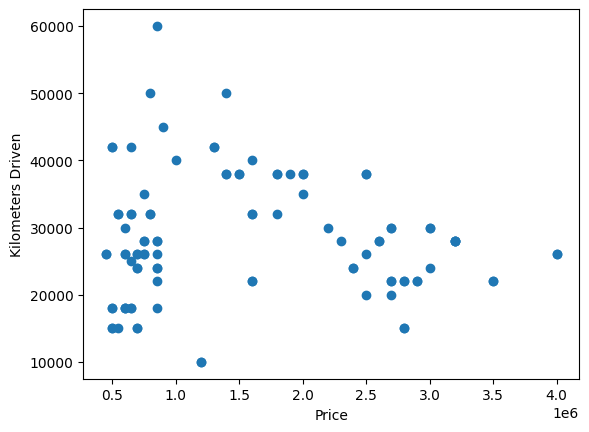

In [13]:
plt.scatter(df.price,df.kilometers_driven)
plt.xlabel('Price')
plt.ylabel('Kilometers Driven')
plt.show()

In [14]:
df.head()

,brand,model,year,kilometers_driven,fuel_type,transmission,owner_type,mileage,engine,power,seats,price
0,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000


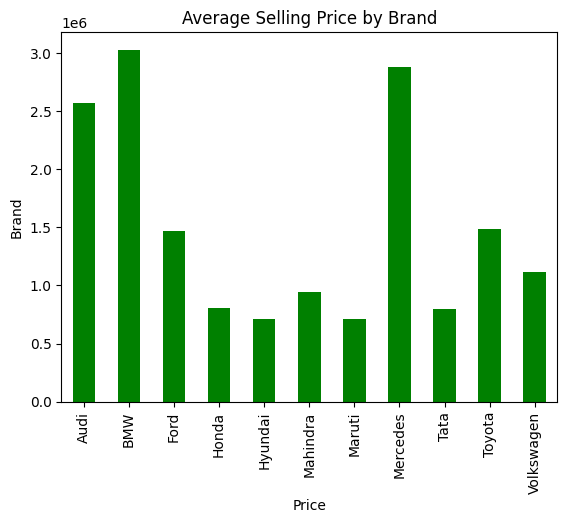

In [15]:
df.groupby('brand')['price'].mean().plot(kind = 'bar', color = 'green')
plt.title('Average Selling Price by Brand')
plt.xlabel('Price')
plt.ylabel('Brand')
plt.show()

Text(0, 0.5, 'Price')

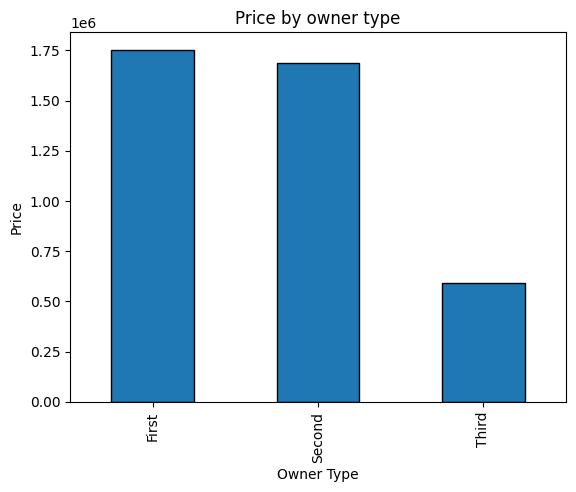

In [16]:
df.groupby(['owner_type'])['price'].mean().plot(kind='bar', edgecolor ='black')
plt.title('Price by owner type')
plt.xlabel('Owner Type')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

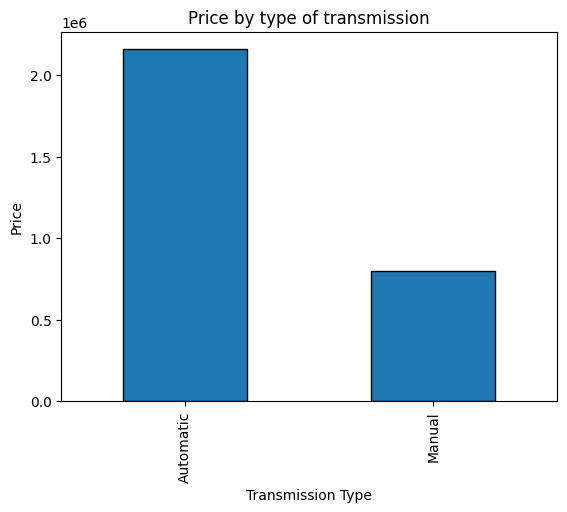

In [17]:
df.groupby(['transmission'])['price'].mean().plot(kind='bar', edgecolor ='black')
plt.title('Price by type of transmission')
plt.xlabel('Transmission Type')
plt.ylabel('Price')

relation between engine power and price

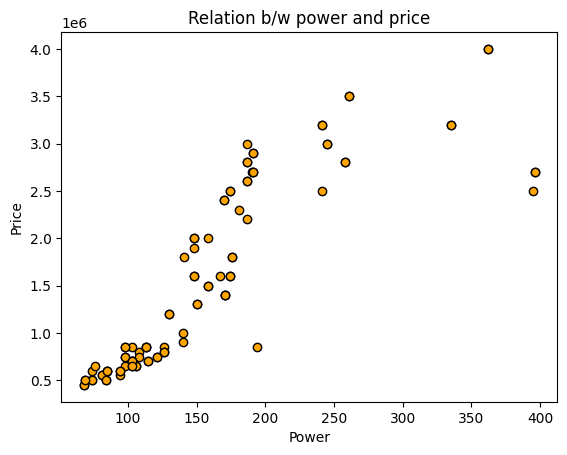

In [18]:
plt.scatter(df.power, df.price, color = 'orange', edgecolor = 'k')
plt.xlabel('Power')
plt.ylabel('Price')
plt.title('Relation b/w power and price')
plt.show()

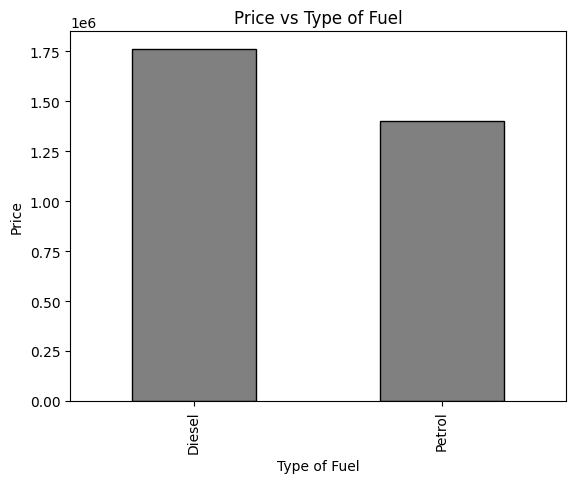

In [19]:
df.groupby('fuel_type')['price'].mean().plot(kind = 'bar', color = 'grey',
                                            edgecolor ='k')
plt.xlabel('Type of Fuel')
plt.ylabel('Price')
plt.title('Price vs Type of Fuel')
plt.show()

In [20]:
df

,brand,model,year,kilometers_driven,fuel_type,transmission,owner_type,mileage,engine,power,seats,price
0,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000
...,...,...,...,...,...,...,...,...,...,...,...,...
95,Mercedes,C-Class,2019,22000,Diesel,Automatic,First,16,1950,191,5,2900000
96,Toyota,Innova Crysta,2017,38000,Diesel,Manual,Second,13,2755,171,7,1400000
97,Ford,EcoSport,2018,26000,Petrol,Manual,Third,18,1497,121,5,750000
98,Hyundai,Verna,2019,24000,Petrol,Automatic,Second,17,1497,113,5,850000


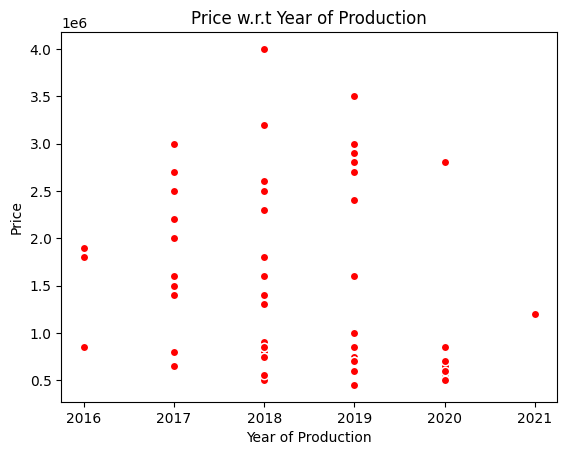

In [21]:
plt.scatter(df.year, df.price, color = 'red', edgecolor = 'white')
plt.xlabel('Year of Production')
plt.ylabel('Price')
plt.title('Price w.r.t Year of Production')
plt.show()

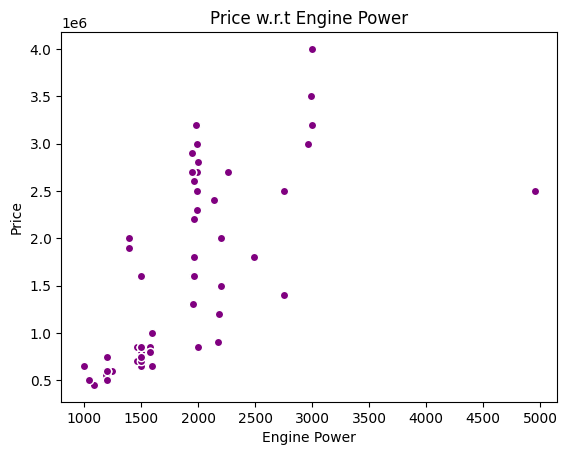

In [22]:
plt.scatter(df.engine, df.price, color = 'purple', edgecolor = 'white')
plt.xlabel('Engine Power')
plt.ylabel('Price')
plt.title('Price w.r.t Engine Power')
plt.show()

In [23]:
from sklearn.pipeline import FeatureUnion

In [24]:
from sklearn.preprocessing import OneHotEncoder

In [25]:
df[categorical_cols]

,brand,model,fuel_type,transmission,owner_type
0,Toyota,Corolla,Petrol,Manual,First
1,Honda,Civic,Petrol,Automatic,Second
2,Ford,Mustang,Petrol,Automatic,First
3,Maruti,Swift,Diesel,Manual,Third
4,Hyundai,Sonata,Diesel,Automatic,Second
...,...,...,...,...,...
95,Mercedes,C-Class,Diesel,Automatic,First
96,Toyota,Innova Crysta,Diesel,Manual,Second
97,Ford,EcoSport,Petrol,Manual,Third
98,Hyundai,Verna,Petrol,Automatic,Second


In [26]:
df[numerical_cols]

,year,kilometers_driven,mileage,engine,power,seats
0,2018,50000,15,1498,108,5
1,2019,40000,17,1597,140,5
2,2017,20000,10,4951,395,4
3,2020,30000,23,1248,74,5
4,2016,60000,18,1999,194,5
...,...,...,...,...,...,...
95,2019,22000,16,1950,191,5
96,2017,38000,13,2755,171,7
97,2018,26000,18,1497,121,5
98,2019,24000,17,1497,113,5


In [27]:
from sklearn.pipeline import Pipeline

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
from sklearn.base import BaseEstimator, TransformerMixin
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [30]:
num_pipeline = Pipeline([
    ('selector', DataFrameSelector(numerical_cols)),
    ('scaler', StandardScaler())
    ])

cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(categorical_cols)),
    ('Encoder', OneHotEncoder(sparse_output = False))
    ])
    

In [31]:
full_pipline = FeatureUnion(transformer_list=[
    ('num_pipeline', num_pipeline),
    ('cat_pipeline', cat_pipeline)])

In [32]:
df.columns

Index(['brand', 'model', 'year', 'kilometers_driven', 'fuel_type',
       'transmission', 'owner_type', 'mileage', 'engine', 'power', 'seats',
       'price'],
      dtype='object')

In [33]:
X = df[['brand', 'model', 'year', 'kilometers_driven', 'fuel_type',
       'transmission', 'owner_type', 'mileage', 'engine', 'power', 'seats']]
y = df['price']

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_transformed = full_pipline.fit_transform(X)

In [36]:
X_transformed[0]

array([-0.33468073,  2.40753993, -0.6710571 , -0.56870447, -0.65458965,
       -0.30814935,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, 
                                                    test_size = 0.2)

Polynomial Regression

In [38]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [39]:
features = [2,3,4]

mse = []
r2 = []

for i in features:
    poly = PolynomialFeatures(degree=i)
    X_poly = poly.fit_transform(X_train)
    reg = LinearRegression()
    reg.fit(X_poly, y_train)
    X_test_poly = poly.transform(X_test)
    y_pred = reg.predict(X_test_poly)
    mse_i = mean_squared_error(y_test, y_pred)
    r2_i = r2_score(y_test, y_pred)
    mse.append(mse_i)
    r2.append(r2_i)
    



In [40]:
mse

[28981591079.981495, 24958374168.92077, 32901784395.150146]

In [41]:
r2

[0.9665860482158511, 0.9712245642832527, 0.9620663118750791]

In [42]:
rmse = [np.sqrt(i) for i in mse]
rmse

[170239.80462859294, 157982.19573395216, 181388.4902499333]

### The model is predicting the price of used cars with 97% accuracy

Visualising the data

In [45]:
from sklearn.manifold import TSNE

In [46]:
tsne = TSNE()

In [49]:
tsne_data = tsne.fit_transform(X_train)
tsne_data

array([[-360.19122  ,   81.125175 ],
       [ 141.96999  ,   -4.903787 ],
       [-324.1758   ,    6.992662 ],
       [-139.95793  ,   85.53147  ],
       [ 183.6498   , -122.497    ],
       [-280.951    , -137.42503  ],
       [ -45.65191  ,  158.49255  ],
       [ 273.75052  ,  133.85661  ],
       [ 165.8058   ,  238.39458  ],
       [ 251.18832  , -262.82318  ],
       [-385.9217   ,  -56.142246 ],
       [ -56.894062 , -206.86836  ],
       [  66.17442  , -321.5213   ],
       [ 251.18832  , -262.82318  ],
       [-333.55438  ,  140.53548  ],
       [ 181.27634  ,  -64.193115 ],
       [ 254.3631   ,  -78.7235   ],
       [ 162.9852   , -188.92937  ],
       [  72.51634  , -212.79861  ],
       [ 235.47725  ,    1.0834666],
       [  -2.3464882,   -4.3001113],
       [-202.99727  ,  308.58557  ],
       [ 409.52997  , -121.285355 ],
       [-150.68706  , -257.45505  ],
       [-155.81567  ,   -6.5304494],
       [-155.81567  ,   -6.5304494],
       [  38.36626  ,  164.11633  ],
 

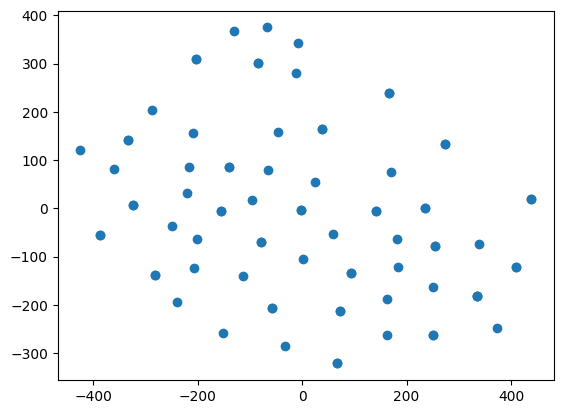

In [50]:
plt.scatter(tsne_data[:,0], tsne_data[: ,1])

lets visualize with PCA

In [51]:
from sklearn.decomposition import PCA

In [52]:
pca = PCA(n_components=2)

In [53]:
pca_data = pca.fit_transform(X_train)

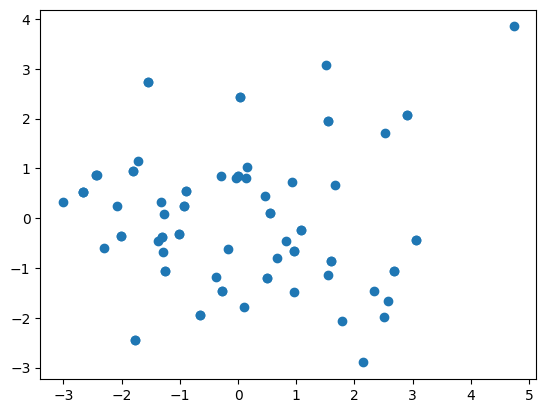

In [55]:
plt.scatter(pca_data[:,0], pca_data[:,1])
plt.show()